# [AI Innovation Square 릴레이 온라인 특강: 시각] 


## 8. 생성모델1


1. AI(Artificial Intelligence) 
2. ML(Machine Learning) 
3. **RL(Representation Learning)**
4. DL(Deep Learning)


### Representation Learning
- 추상적인 특징을 추출
    - Auto-encoder, Variational Auto-encoder
    - GAN
- 학습 잘 안되고 느림
- 데이터가 없는 경우 생성모델을 이용해서 데이터 확보 실제로는 불가


#### AutoEncoder
- 학습을 통해서 데이터의 추상적인 특징을 추출해서 다시 복원 
    - Encoder: 이미지의 특징을 추상화해서 간략하게 표현
    - Decoder: 간략하게 표현한 것을 다시 원본처럼 복원
> abstraction(추상화) : 불필요한 것을 제거해서 작게 표현


> 시사인 얀르쿤 인터뷰(2008) 참고:https://www.sisain.co.kr/news/articleView.html?idxno=32487


#### Autoencoder 3요소 
1. loss function
    - 비지도학습:자기 자신와 생성된 이미지와 비교
2. encoding function
    - 원본에 대한 압축된 표현
3. decoding function
    - 원본에 가깝게압축 해제 복원

-  활용
    - 고유의 특성을 학습해서 복원하기 때문에 노이즈 제거, 이상치 탐색 가능
#### 구조
- Deep/stacked Autoencoder: 여러개의 encoder, decoder
    - 추상화 단계가 급격하지 않음
    
- Keras autoencoder(2016): https://keraskorea.github.io/posts/2018-10-23-keras_autoencoder/

##### simple autoencoder
- mnst 입력 784 - 압축 32 - 복원 784 (sigmoid : 0,1 )

In [10]:
import tensorflow as tf

(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data() # y값 불필요
#scaling
X_train=X_train/255
X_test=X_test/255
#input=784
X_train=X_train.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)

In [7]:
##함수형 패러다임 
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(32, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

#multi-inputs,multi-outputs 지원
autoencoder = tf.keras.Model(input_img, decoded)

In [15]:
 autoencoder.compile(loss='binary_crossentropy',optimizer='adam') 

loss가 0.0921에서 변하지 않음(Plateau)

In [17]:
autoencoder.fit(X_train,X_train, epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0946
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0943
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0941
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0940A: 0s - loss: 0.0
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0938
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0937
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0936
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0935
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0934
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0934
Epoch 11/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0933
Epoch 12/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0

469/469 [==============================] - 2s 5ms/step - loss: 0.0921
Epoch 100/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0921


 원래이미지와 autoencoder 통해 복원된 이미지 비교

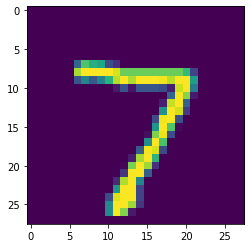

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape(28,28))

- 압축,해제과정에서 손실이 있어서 흐릿함
- 실제처럼 표현하기 힘듦

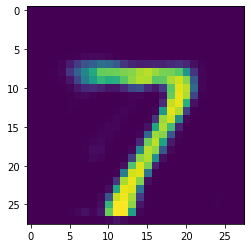

In [21]:
plt.imshow(autoencoder(X_test[0][tf.newaxis]).numpy().reshape(28,28))

#### regularizer
- 급격하게 변하는것을 막음
    - L1,L2: weight decay 
    - kernel, bias regularizer  : overfitting 방지
    - activity regularizer
    
#### activity regularizer
- 표현을 더 간결하게 제한

In [25]:
import tensorflow as tf

##activity_regularizer  
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(32, activation='relu',
                                activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(input_img, decoded)

In [26]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam') 
autoencoder.fit(X_train,X_train, epochs=200, batch_size=128)

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2365
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1498
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1291
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1183
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1125
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1094
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1076
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1064
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1055
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1047
Epoch 11/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1041
Epoch 12/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1036
Epoch 13/100


469/469 [==============================] - 3s 6ms/step - loss: 0.0962
Epoch 100/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0962


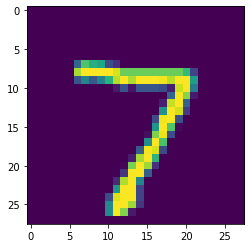

In [27]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape(28,28))

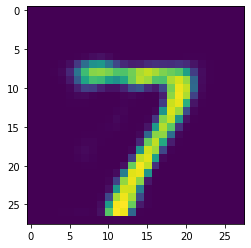

In [28]:
plt.imshow(autoencoder(X_test[0][tf.newaxis]).numpy().reshape(28,28))

- 200번 epoch 해서 더 실제 이미지와 가깝도록 해야함
-  overfitting되야 더 실제 같음

### Deep Auto-Encoder:
- 여러개의 encoder, decoder를 쌓음stacking
- 추상화 단계가 급격하지 않음
- 딥하면 학습이 잘 안되어 데이터 많이 필요


In [ ]:
import tensorflow as tf

##함수형 패러다임 
input_img = tf.keras.Input(shape=(784,))
encoded1 = tf.keras.layers.Dense(256, activation='relu')(input_img)
encoded2 = tf.keras.layers.Dense(128, activation='relu')(encoded1)
encoded3 = tf.keras.layers.Dense(64, activation='relu')(encoded2)
encoded4 = tf.keras.layers.Dense(32, activation='relu')(encoded3)
encoded5 = tf.keras.layers.Dense(16, activation='relu')(encoded4)
decoded1 = tf.keras.layers.Dense(32, activation='relu')(encoded4)
decoded2 = tf.keras.layers.Dense(64, activation='relu')(decoded1)
decoded3 = tf.keras.layers.Dense(128, activation='relu')(decoded2)
decoded4 = tf.keras.layers.Dense(256, activation='relu')(decoded3)
decoded5 = tf.keras.layers.Dense(784, activation='sigmoid')(decoded4)

#multi-inputs,multi-outputs 지원
autoencoder = tf.keras.Model(input_img, decoded)

- 모델을 레이어로 만들면 유지보수 편함
- 재활용 가능

In [29]:
input_img = tf.keras.Input(shape=(28*28,))

encoder=tf.keras.models.Sequential([
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(16, activation='relu'),
])

decoder=tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(784, activation='relu'),
])

- Model 상속
- call : build, __call__ [closure technique ]
- composition: 다른 클래스를 클래스 내부에 정의
- 파이썬 객체지향: 접근제한자 없어서 외부에서 접근 가능


- TensorFlow autoencoder(2019): https://www.tensorflow.org/tutorials/generative/autoencoder

In [32]:
latent_dim = 64 

class Autoencoder(tf.keras.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    #접근 가능
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(784, activation='sigmoid'),
      tf.keras.layers.Reshape((28, 28))
    ])

  def call(self, x): 
    #접근 불가
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded #return self.decoder(self.encoder(x))

autoencoder = Autoencoder(latent_dim)

In [34]:
autoencoder.encoder  #점근 가능

In [33]:
autoencoder.encoded

AttributeError: 'Autoencoder' object has no attribute 'encoded'

In [35]:
autoencoder.compile(loss='mse',optimizer='adam')

In [37]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [38]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0237 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.00

In [39]:
autoencoder.encoder(X_test)

<tf.Tensor: shape=(10000, 64), dtype=float32, numpy=
array([[0.3495953 , 2.057228  , 2.3667097 , ..., 1.0503961 , 0.06466138,
        1.8933918 ],
       [0.26482403, 1.6409382 , 0.        , ..., 1.3208687 , 2.3377743 ,
        0.6832122 ],
       [1.4499239 , 0.830654  , 0.79462796, ..., 1.7379441 , 0.90347135,
        0.        ],
       ...,
       [0.45849693, 1.3039129 , 1.9537377 , ..., 0.873881  , 1.3125199 ,
        2.1169553 ],
       [1.7779619 , 0.        , 1.1596594 , ..., 4.7007704 , 1.0242424 ,
        1.4215298 ],
       [1.1136274 , 2.7019396 , 4.466265  , ..., 4.0341234 , 2.5870347 ,
        4.4483013 ]], dtype=float32)>

### 이미지 denoising 
- 이미지의 noise를 제거

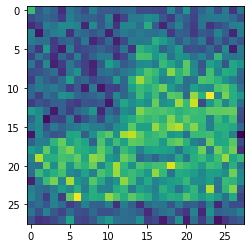

In [110]:
x_train_noise=x_train +0.3 *tf.random.normal(shape=x_train.shape)
plt.imshow(x_train_noise[0].numpy()) #noise 추가

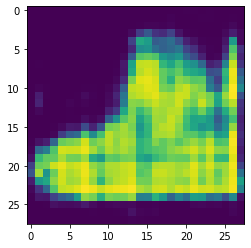

In [49]:
t=autoencoder(x_train_noise[0].numpy()[tf.newaxis]).numpy()
plt.imshow(t.reshape(28,28))

noise 제거되어 나옴

### DCautoencoder
- Deep Convolution autoencoder
    - Fully connected 를 convolution으로 교체

- 성능이 압도적으로 좋음
- pooling대신 strides
- padding = valid, same
- Conv2DTranspose :deconvolution 컨볼루션의 반대

In [74]:
class DCAutoencoder(tf.keras.Model):
  def __init__(self):
    super( ).__init__()
    
    self.encoder = tf.keras.Sequential([
        tf.keras.Input(shape=(28,28,1)), #build 에서 모양 미리 결정
        tf.keras.layers.Conv2D(64,3,activation='relu',
                              padding='same',strides=2),
        tf.keras.layers.Conv2D(32,3,activation='relu',
                               padding='same',strides=2)
    ])
    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(32,3, padding='same',strides=2), 
        tf.keras.layers.Conv2DTranspose(64,6, padding='same',strides=2), 
        tf.keras.layers.Conv2D(1,3,activation='sigmoid',padding='same')
    ])

  def call(self, x): 
     return self.decoder(self.encoder(x))

In [83]:
from tensorflow.keras import layers

In [88]:
input_img = tf.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded)

In [75]:
dcautoencoder=DCAutoencoder()

In [76]:
dcautoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [78]:
X_train=X_train.reshape(-1,28,28,1)

In [ ]:
dcautoencoder.fit(X_train, X_train, epochs=2)

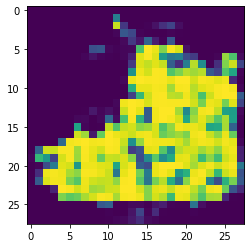

In [81]:
t=dcautoencoder(x_train_noise[0].numpy()[tf.newaxis]).numpy()
plt.imshow(t.reshape(28,28))

### Convolutional VAE
- 참고 : https://www.tensorflow.org/tutorials/generative/cvae
    - VAE 추정 기법 사용해서 GAN과 같이 원하는 데이터 파라미터 조작해서 만듦
